# 1. Install and Import Dependencies

In [1]:
!pip install torch==1.8.1+cu111 torchvision==0.9.1+cu111 torchaudio===0.8.1 -f https://download.pytorch.org/whl/lts/1.8/torch_lts.html

Looking in links: https://download.pytorch.org/whl/lts/1.8/torch_lts.html


ERROR: Could not find a version that satisfies the requirement torch==1.8.1+cu111 (from versions: 2.0.0, 2.0.1, 2.1.0)
ERROR: No matching distribution found for torch==1.8.1+cu111

[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...


In [3]:
!cd yolov5 & pip install -r requirements.txt

     ---------------------------------------- 7.6/7.6 MB 8.0 MB/s eta 0:00:00
     ---------------------------------------- 2.6/2.6 MB 15.1 MB/s eta 0:00:00
     -------------------------------------- 192.3/192.3 MB 6.5 MB/s eta 0:00:00
     ---------------------------------------- 1.3/1.3 MB 11.5 MB/s eta 0:00:00
     ---------------------------------------- 78.3/78.3 kB 4.3 MB/s eta 0:00:00
     ------------------------------------- 645.2/645.2 kB 20.5 MB/s eta 0:00:00
     ------------------------------------- 294.6/294.6 kB 19.0 MB/s eta 0:00:00
  Using cached setuptools-68.2.2-py3-none-any.whl (807 kB)
     ------------------------------------- 187.6/187.6 kB 11.8 MB/s eta 0:00:00
     ---------------------------------------- 2.1/2.1 MB 15.2 MB/s eta 0:00:00
     ---------------------------------------- 56.1/56.1 kB ? eta 0:00:00
     -------------------------------------- 103.1/103.1 kB 6.2 MB/s eta 0:00:00
     ---------------------------------------- 5.7/5.7 MB 13.6 MB/s eta 0:


[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

# 2. Load Model

In [5]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

c:\Users\debab\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\hub.py:294: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\debab/.cache\torch\hub\master.zip
YOLOv5  2023-11-8 Python-3.11.3 torch-2.1.0+cpu CPU

100%|██████████| 14.1M/14.1M [00:02<00:00, 5.50MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding A

In [6]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

# 3. Make Detections with Images

In [23]:
img = 'base.jpg'

In [24]:
results = model(img)
results.print()

image 1/1: 400x250 7 persons, 1 tie, 1 sports ball
Speed: 10.5ms pre-process, 222.5ms inference, 1.0ms NMS per image at shape (1, 3, 640, 416)


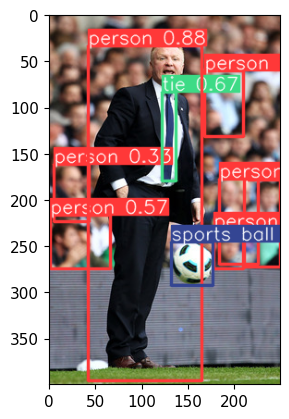

In [25]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [26]:
results.render()

[array([[[135, 100,  78],
         [134,  99,  77],
         [136,  99,  80],
         ...,
         [ 85,  66,  59],
         [ 82,  64,  60],
         [ 80,  62,  58]],
 
        [[143, 108,  86],
         [141, 105,  83],
         [138, 102,  80],
         ...,
         [105,  78,  69],
         [ 96,  71,  66],
         [ 94,  69,  64]],
 
        [[150, 114,  90],
         [146, 110,  86],
         [141, 105,  83],
         ...,
         [123,  89,  77],
         [115,  81,  71],
         [113,  79,  69]],
 
        ...,
 
        [[106, 129,  47],
         [113, 136,  56],
         [117, 140,  60],
         ...,
         [ 95, 131,  41],
         [ 96, 130,  36],
         [ 96, 130,  36]],
 
        [[113, 133,  62],
         [118, 138,  69],
         [121, 141,  72],
         ...,
         [ 98, 134,  36],
         [103, 132,  39],
         [104, 133,  40]],
 
        [[146, 162, 100],
         [148, 163, 104],
         [148, 163, 104],
         ...,
         [107, 141,  47],
  

# 4. Real Time Detections

In [27]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

# 5. Train from scratch

In [28]:
import uuid   # Unique identifier
import os
import time

In [40]:
IMAGES_PATH = os.path.join('F:\SOI\YOLO-Drowsiness-Detection\yolov5\data', 'images') #/data/images
labels = ['awake', 'drowsy']
number_imgs = 5

In [41]:
cap = cv2.VideoCapture(0)
# Loop through labels
for label in labels:
    print('Collecting images for {}'.format(label))
    time.sleep(5)
    
    # Loop through image range
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        
        # Webcam feed
        ret, frame = cap.read()
        
        # Naming out image path
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        
        # Writes out image to file 
        cv2.imwrite(imgname, frame)
        
        # Render to the screen
        cv2.imshow('Image Collection', frame)
        
        # 2 second delay between captures
        time.sleep(2)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

In [42]:
print(os.path.join(IMAGES_PATH, labels[0]+'.'+str(uuid.uuid1())+'.jpg'))

F:\SOI\YOLO-Drowsiness-Detection\yolov5\data\images\awake.eb7efc3b-7e50-11ee-b628-fa5ea23728db.jpg


In [32]:
for label in labels:
    print('Collecting images for {}'.format(label))
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        print(imgname)   

data\images\awake.adb65a78-7e4a-11ee-8053-fa5ea23728db.jpg
data\images\awake.adb65a79-7e4a-11ee-a5d6-fa5ea23728db.jpg
data\images\awake.adb65a7a-7e4a-11ee-86e3-fa5ea23728db.jpg
data\images\awake.adb65a7b-7e4a-11ee-991d-fa5ea23728db.jpg
data\images\awake.adb65a7c-7e4a-11ee-a643-fa5ea23728db.jpg
data\images\drowsy.adb65a7d-7e4a-11ee-84da-fa5ea23728db.jpg
data\images\drowsy.adb65a7e-7e4a-11ee-ac7f-fa5ea23728db.jpg
data\images\drowsy.adb65a7f-7e4a-11ee-b3a1-fa5ea23728db.jpg
data\images\drowsy.adb65a80-7e4a-11ee-bebf-fa5ea23728db.jpg
data\images\drowsy.adb65a81-7e4a-11ee-9019-fa5ea23728db.jpg


In [33]:
!git clone https://github.com/tzutalin/labelImg

Cloning into 'labelImg'...


In [43]:
!pip install pyqt5 lxml --upgrade
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc


[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [59]:
!cd yolov5 && python train.py --img 320 --batch 5 --epochs 5 --data dataset.yml --weights yolov5s.pt --workers 2

train: weights=yolov5s.pt, cfg=, data=dataset.yml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=5, batch_size=5, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 
YOLOv5  v7.0-240-g84ec8b5 Python-3.11.3 torch-2.1.0+cpu CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees=0.0, translate=0.1, sca

# 6. Load Custom Model

In [63]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path=r'F:\SOI\YOLO-Drowsiness-Detection\yolov5\runs\train\exp10\weights\last.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\debab/.cache\torch\hub\master.zip
YOLOv5  2023-11-9 Python-3.11.3 torch-2.1.0+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7055974 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


In [69]:
img = os.path.join('F:\SOI\YOLO-Drowsiness-Detection\yolov5\data', 'images', 'drowsy.d376e02c-7e50-11ee-ae5d-fa5ea23728db.jpg')

In [70]:
results = model(img)

In [71]:
results.print()

image 1/1: 480x640 (no detections)
Speed: 16.0ms pre-process, 237.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)


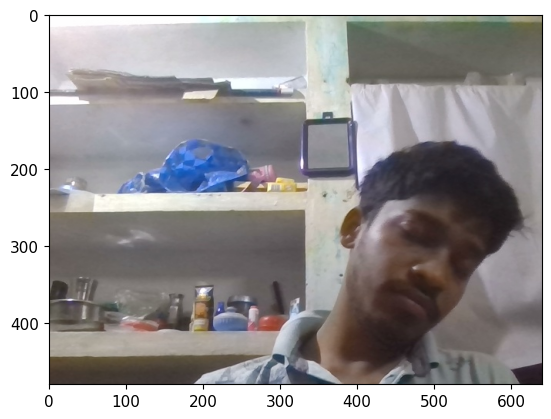

In [72]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [15]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()